In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

## Find all the 9s

**1. Find the 9s using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).**

I could not download the .gz files from the website due to the error below. Below, I import the dataset from sklearn directly.

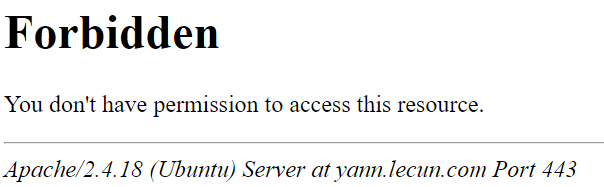

In [2]:
# MNIST dataset from sklearn
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

print(f'X shape: {X.shape}\n', f'y shape:{y.shape}')
X.head()

X shape: (70000, 784)
 y shape:(70000,)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# due to long training times in early testing,
# randomly sample the dataset.
np.random.seed(42)

sample_size = 10_000

sample = np.random.randint(0, X.shape[0], sample_size)

X = X.iloc[sample,:]
y = y.iloc[sample]

print(f'X shape: {X.shape}\n', f'y shape:{y.shape}')


# assign a 1 if the labels in pd.series is 9, else 0
y_binary = np.where(y == '9', 1, 0)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

X shape: (10000, 784)
 y shape:(10000,)


In [4]:
def evaluate_knn(order):
    """
    KNN stores the feature vectors and their corresponding labels from the training dataset.

    When new data point is given for prediction, KNN calculates the distance between the new data point and all the training data points using a distance metric.

    Then selects the K nearest neighbors to the new data point based on the calculated distances and assigns the label that is most frequent among the neighbors.

    Minkowski order 1: Manhattan distance
    Minkowski order 2: Euclidean distance
    Minkowski order 3: 3rd degree Minkowski distance??
    """
    knn = KNeighborsClassifier(metric='minkowski', p=order)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Minkowski order {order}:")
    print(classification_report(y_test, y_pred))


for order in [1, 2, 3]:
    evaluate_knn(order)

Minkowski order 1:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1799
           1       0.90      0.93      0.91       201

    accuracy                           0.98      2000
   macro avg       0.95      0.96      0.95      2000
weighted avg       0.98      0.98      0.98      2000

Minkowski order 2:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1799
           1       0.90      0.94      0.91       201

    accuracy                           0.98      2000
   macro avg       0.94      0.96      0.95      2000
weighted avg       0.98      0.98      0.98      2000

Minkowski order 3:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1799
           1       0.89      0.94      0.91       201

    accuracy                           0.98      2000
   macro avg       0.94      0.96      0.95      2000
weighted avg     

**2. Find the 9s using Decision tree.**

In [5]:
def decision_tree():
    """
    Chooses the best features to split the data based on criteria like Gini impurity and entropy.
    Then recursively splits the subsets into smaller subsets, creating nodes.
    The process continues until the tree reaches a certain depth or no further splits can be made.
    """
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print("Decision Tree (9's):")
    print(classification_report(y_test, y_pred))

decision_tree()

Decision Tree (9's):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1799
           1       0.81      0.77      0.79       201

    accuracy                           0.96      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.96      0.96      0.96      2000



**3. Find the 9s using Random Forests.**

In [6]:
def random_forest():
    """
    Creates multiple decision trees during training.
    Each tree is trained on a random subset of the training data.
    The trees are then used to make predictions.
    The final prediction is the mode of the predictions from all the trees.
    """
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    print("Random Forest (9's):")
    print(classification_report(y_test, y_pred))

random_forest()

Random Forest (9's):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1799
           1       0.97      0.76      0.85       201

    accuracy                           0.97      2000
   macro avg       0.97      0.88      0.92      2000
weighted avg       0.97      0.97      0.97      2000



##  Find every single digit!

**1. First forget about the labels and run the k-means algorithm to find whether there is an underlying patterns. So, first find the k clusters (here is obviously 10 clusters). Then look at their labels and find the accuracy. By doing this you are turning a supervised learning into an unsupervised learning!**

In [28]:
X, y = mnist['data'], mnist['target']

# get random sample (n=10k)
X = X.iloc[sample,:]
y = y.iloc[sample]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

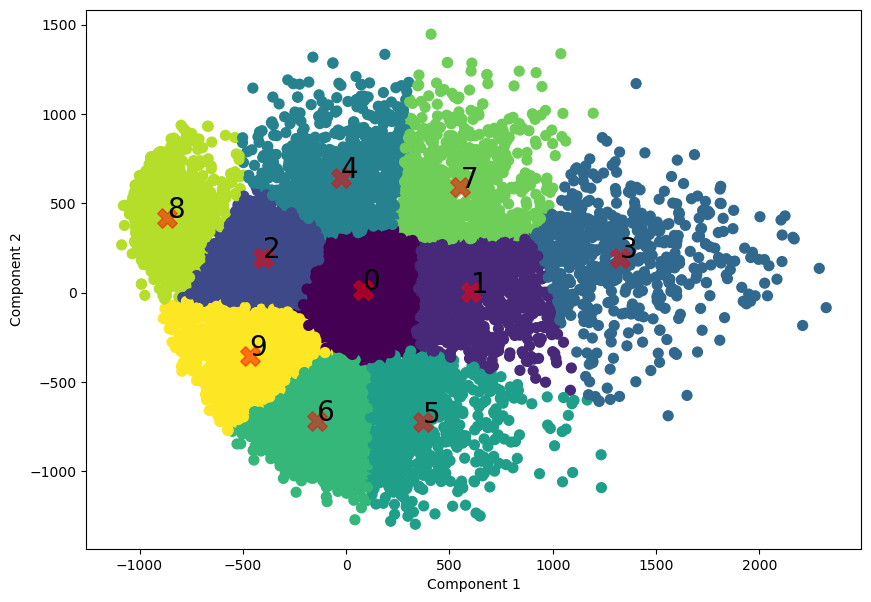

In [72]:
from sklearn.decomposition import PCA

# reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-Means clustering on the reduced data
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# clusters and centroids
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X')

# show labels
for i, c in enumerate(centroids):
    plt.text(c[0], c[1], str(i), fontsize=20, color='black')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [51]:
def review_clusters():
    """
    Review the clusters and their corresponding labels.
    """
    cluster_df = pd.DataFrame()
    for i in range(10):
        cluster = X[labels == i]
        cluster_index = cluster.index
        y_cluster = y[cluster_index]
        # print(f'Cluster {i}: {y_cluster.value_counts()}')

        cluster_df[f'Cluster {i}'] = y_cluster.value_counts()

        cluster_df = cluster_df.sort_index()

    return cluster_df

clusters_df = review_clusters()
clusters_df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9
class,,,,,,,,,,
0,76,323,3,556,1,10,1,113,0,4
1,5,0,113,0,10,0,0,0,1194,2
2,263,213,159,27,290,5,10,114,32,64
3,105,30,184,4,497,0,1,318,15,19
4,29,7,32,1,0,314,401,0,9,301
5,315,131,172,17,76,16,30,191,6,89
6,370,290,151,42,26,145,16,29,15,32
7,27,3,39,0,0,133,471,0,31,447
8,344,93,322,17,157,22,29,92,23,42


In [59]:
def cluster_accuracy():
    """
    Calculate the accuracy of the clusters by comparing the most common label in each cluster to the true label.
    """
    # cluster_df = pd.DataFrame()
    for i in range(10):
        col = f'Cluster {i}'
        accuracy = clusters_df[col].max()/clusters_df[col].sum()
        print(f'Cluster {i} Accuracy: {accuracy:.2f}')

cluster_accuracy()

Cluster 0 Accuracy: 0.24
Cluster 1 Accuracy: 0.29
Cluster 2 Accuracy: 0.27
Cluster 3 Accuracy: 0.83
Cluster 4 Accuracy: 0.47
Cluster 5 Accuracy: 0.36
Cluster 6 Accuracy: 0.34
Cluster 7 Accuracy: 0.37
Cluster 8 Accuracy: 0.89
Cluster 9 Accuracy: 0.33


**2. Find the digits using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).**

In [10]:
def evaluate_knn(order):
    """
    Function to evaluate KNN with different Minkowski orders

    Minkowski order 1: Manhattan distance
    Minkowski order 2: Euclidean distance
    Minkowski order 3: 3rd degree Minkowski distance?

    """
    knn = KNeighborsClassifier(metric='minkowski', p=order)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Minkowski order {order}:")
    print(classification_report(y_test, y_pred))



for order in [1, 2, 3]:
    evaluate_knn(order)

Minkowski order 1:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       187
           1       0.83      1.00      0.91       229
           2       0.98      0.88      0.93       190
           3       0.92      0.95      0.93       186
           4       0.93      0.87      0.90       207
           5       0.93      0.94      0.94       194
           6       0.96      0.98      0.97       184
           7       0.91      0.94      0.93       206
           8       0.99      0.81      0.89       205
           9       0.90      0.90      0.90       212

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.92      2000

Minkowski order 2:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       187
           1       0.88      1.00      0.94       229
           2       0.98      0.91      0

**3. Find the digits using Decision tree.**

In [11]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# predict the labels for the test set
y_pred = dtree.predict(X_test)

# evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree classifier: {accuracy * 100:.2f}%")

# Detailed classification report
print("Decision Tree (All):")
print(classification_report(y_test, y_pred))

Accuracy of Decision Tree classifier: 79.45%
Decision Tree (All):
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       187
           1       0.88      0.94      0.91       229
           2       0.70      0.70      0.70       190
           3       0.74      0.76      0.75       186
           4       0.80      0.79      0.80       207
           5       0.73      0.73      0.73       194
           6       0.85      0.85      0.85       184
           7       0.82      0.82      0.82       206
           8       0.74      0.70      0.72       205
           9       0.80      0.76      0.78       212

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



**4. Find the digits using Random Forests.**

In [73]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Random Forest classifier: {accuracy * 100:.2f}%")
print("Random Forest (All):")
print(classification_report(y_test, y_pred))

Accuracy of Random Forest classifier: 94.25%
Random Forest (All):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       216
           1       0.96      0.98      0.97       250
           2       0.93      0.95      0.94       189
           3       0.91      0.90      0.91       196
           4       0.94      0.96      0.95       194
           5       0.93      0.94      0.94       193
           6       0.95      0.98      0.97       189
           7       0.94      0.94      0.94       213
           8       0.95      0.91      0.93       191
           9       0.94      0.88      0.91       169

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



**5. Comment on any significant difference between your results for the binary classifier vs multi-class classifiers.**

The binary classification model tends to perform slightly better than the multi-class model. For example, accuracy was 96% for binary classification and 87% for multi-class. 

This can be explained based on the nature of binary classification which requires the model to separate two classes in which decision boundary is easier to draw. 

On the other hand, multi-class classification requires separating multiple classes --> more complex boundaries and greater potential for misclassification between classes